In [2]:
import pandas as pd
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer

e:\repos\SURP-2024\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_excel('GS1.xlsx')
df.sample(3)

,Year,Question
117,2018,‘Women’s movement in India has not addressed t...
187,2014,"What were the major political, economic and so..."
139,2017,“The growth of cities as I.T. hubs has opened ...


In [5]:
questions = df['Question'].values.tolist()
questions[:3]

['Explain the role of geographical factors towards the development of Ancient India.',
 'What was the difference between Mahatma Gandhi and Rabindranath Tagore in their approach towards education and nationalism?',
 'Bring out the socio-economic effects of the introduction of railways in different countries of the world']

In [6]:
#PIPELINE OF BERTMODEL
# 1. EMBEDDING - BY DEFAULT USES all-MiniLM-L6-v2 SENTENCE TRANSFORMER
# 2.  

In [7]:
#WE WILL USE THE BERTOPIC MODEL TO CLUSTER THE QUESTIONS
#FIRST USING DEFAULT MODEL

model = BERTopic()
topics, probs = model.fit_transform(questions)

In [8]:
model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,61,-1_of_the_in_and,"[of, the, in, and, india, on, discuss, is, wit...",[Why did the industrial revolution first occur...
1,0,35,0_in_the_cultural_indian,"[in, the, cultural, indian, and, society, to, ...","[In the context of the diversity of India, can..."
2,1,33,1_the_of_and_on,"[the, of, and, on, do, how, in, explain, weste...",[What do you understand by the phenomenon of ‘...
3,2,29,2_the_british_to_of,"[the, british, to, of, were, in, was, did, wha...",[What were the events that led to the Suez Cri...
4,3,28,3_the_of_in_india,"[the, of, in, india, to, for, is, development,...",[Discuss the main objectives of Population Edu...
5,4,18,4_water_and_of_the,"[water, and, of, the, in, is, india, resources...",[what are the environmental implications of th...
6,5,17,5_art_the_architecture_of,"[art, the, architecture, of, indian, and, disc...",[Mesolithic rock cut architecture of India not...
7,6,14,6_women_in_india_the,"[women, in, india, the, sex, womens, ratio, of...",[‘Women’s movement in India has not addressed ...


In [9]:
model.generate_topic_labels(topic_prefix=False,separator=', ')

['of, the, in',
 'in, the, cultural',
 'the, of, and',
 'the, british, to',
 'the, of, in',
 'water, and, of',
 'art, the, architecture',
 'women, in, india']

In [10]:
model.visualize_documents(questions)

In [11]:
#USING DIFFERENT WORD EMBEDDINGS
#USING SENTENCE TRANSFORMER
"""
    The all-mpnet-base-v2 model provides superior accuracy and a deeper understanding of the context and nuances in the text.
    Given the manageable size of your dataset (200-300 questions), 
    the additional computational resources required by this model are justified by the improved performance and precision.  
    Recommendation : huggingface transformer model sentence-transformers/stsb-roberta-large is best for this with best accuracy as far as i could find,
    but requires so much computation my little laptop cannot handle.
    even this model all-mpnet-base-v2 is heavy but i can manage it. like it takes 4-5 minutes to run the model.  
"""
sentence_model = SentenceTransformer('all-mpnet-base-v2')

In [12]:
model  = BERTopic(embedding_model=sentence_model)
topics, probs = model.fit_transform(questions)

In [13]:
model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,29,-1_the_of_in_discuss,"[the, of, in, discuss, india, for, was, factor...",[Identify and discuss the factors responsible ...
1,0,83,0_the_of_in_india,"[the, of, in, india, is, and, to, discuss, wom...","[In the context of the diversity of India, can..."
2,1,62,1_the_of_and_in,"[the, of, and, in, water, how, on, are, why, w...",[What do you understand by the phenomenon of ‘...
3,2,44,2_the_of_and_to,"[the, of, and, to, in, british, india, what, w...",[How did the colonial rule affect the tribals ...
4,3,17,3_the_art_of_and,"[the, art, of, and, indian, architecture, in, ...",[Indian Philosophy and tradition played a sign...


In [14]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
embeddings = model._extract_embeddings(questions)
tsne = TSNE(n_components=2,random_state=42)
reduced = tsne.fit_transform(embeddings)

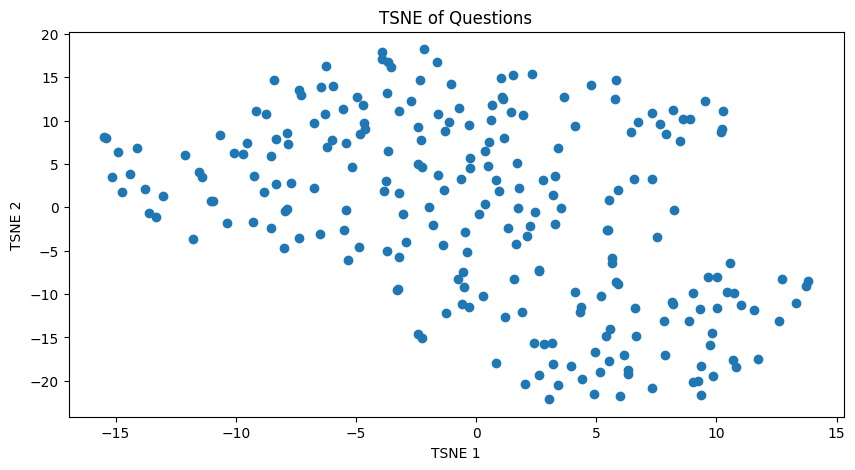

In [15]:
plt.figure(figsize=(10,5))
plt.scatter(reduced[:,0], reduced[:,1])
plt.title("TSNE of Questions")
plt.xlabel("TSNE 1")
plt.ylabel("TSNE 2")
plt.show()

In [16]:
model.visualize_documents(questions)

In [17]:
#USING FINETUNING 
from bertopic.representation import KeyBERTInspired
from bertopic.representation import MaximalMarginalRelevance
from bertopic.representation import PartOfSpeech

representation = [PartOfSpeech("en_core_web_sm"),MaximalMarginalRelevance(diversity=0.2),KeyBERTInspired(top_n_words=30)]

model = BERTopic(embedding_model=sentence_model,representation_model=representation,verbose=True,calculate_probabilities=True, nr_topics=20, n_gram_range=(1, 3), min_topic_size=5)



In [18]:
topics, probs = model.fit_transform(questions)

2024-07-15 22:03:59,364 - BERTopic - Embedding - Transforming documents to embeddings.
Batches: 100%|██████████| 8/8 [00:11<00:00,  1.45s/it]
2024-07-15 22:04:11,002 - BERTopic - Embedding - Completed ✓
2024-07-15 22:04:11,002 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-07-15 22:04:17,842 - BERTopic - Dimensionality - Completed ✓
2024-07-15 22:04:17,843 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-07-15 22:04:17,875 - BERTopic - Cluster - Completed ✓
2024-07-15 22:04:17,877 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-07-15 22:04:31,851 - BERTopic - Representation - Completed ✓
2024-07-15 22:04:31,851 - BERTopic - Topic reduction - Reducing number of topics
2024-07-15 22:04:31,851 - BERTopic - Topic reduction - Reduced number of topics from 9 to 9


In [19]:
model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,35,-1_development in india_scheduled tribes_of in...,"[development in india, scheduled tribes, of in...",[Though not very useful from the point of view...
1,0,64,0_climate change_climate_glaciers_weather,"[climate change, climate, glaciers, weather, l...",[Why are the world’s fold mountain systems loc...
2,1,23,1_colonial india_the anti colonial_the colonia...,"[colonial india, the anti colonial, the coloni...",[What were the events that led to the Suez Cri...
3,2,17,2_of indian independence_indian independence_m...,"[of indian independence, indian independence, ...",[Why did the ‘Moderates’ failed to carry convi...
4,3,11,3_energy in india_its mining industry_iron and...,"[energy in india, its mining industry, iron an...",[Account for the change in the spatial pattern...
5,4,15,4_indian art_of temple architecture_of gupta p...,"[indian art, of temple architecture, of gupta ...",[How do you justify the view that the level of...
6,5,34,5_diversity in india_indian society_in indian ...,"[diversity in india, indian society, in indian...",[The spirit of tolerance and love is not only ...
7,6,20,6_urbanization_of rural urban_delhi_cities of,"[urbanization, of rural urban, delhi, cities o...",[“The growth of cities as I.T. hubs has opened...
8,7,16,7_patriarchy impact the_poverty is the_populat...,"[patriarchy impact the, poverty is the, popula...",[Critically examine whether growing population...


In [20]:
model.visualize_documents(questions)

In [21]:
#UPDATING C-TF-IDF
from bertopic.vectorizers import ClassTfidfTransformer
ctfidf_model = ClassTfidfTransformer(bm25_weighting=True,reduce_frequent_words=True)
model = BERTopic(embedding_model=sentence_model,representation_model=representation,ctfidf_model=ctfidf_model,verbose=True,calculate_probabilities=True, nr_topics=20, n_gram_range=(1, 3), min_topic_size=5)

In [22]:
topics, probs = model.fit_transform(questions)

2024-07-15 22:04:49,855 - BERTopic - Embedding - Transforming documents to embeddings.
Batches: 100%|██████████| 8/8 [00:11<00:00,  1.44s/it]
2024-07-15 22:05:01,402 - BERTopic - Embedding - Completed ✓
2024-07-15 22:05:01,403 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-07-15 22:05:07,977 - BERTopic - Dimensionality - Completed ✓
2024-07-15 22:05:07,979 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-07-15 22:05:08,007 - BERTopic - Cluster - Completed ✓
2024-07-15 22:05:08,009 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-07-15 22:05:21,551 - BERTopic - Representation - Completed ✓
2024-07-15 22:05:21,551 - BERTopic - Topic reduction - Reducing number of topics
2024-07-15 22:05:21,551 - BERTopic - Topic reduction - Reduced number of topics from 9 to 9


In [23]:
model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,46,-1_tribals in india_in colonial india_industri...,"[tribals in india, in colonial india, industri...",[Though not very useful from the point of view...
1,0,64,0_glaciers_climate_climate change_western ghats,"[glaciers, climate, climate change, western gh...",[What do you understand by the phenomenon of ‘...
2,1,19,1_indian art_of the gupta_of vijayanagar was_o...,"[indian art, of the gupta, of vijayanagar was,...",[The rock-cut architecture represents one of t...
3,2,9,2_its mining industry_oil producing areas_oil ...,"[its mining industry, oil producing areas, oil...",[Despite India being one of the countries of t...
4,3,18,3_poverty in india_poverty is the_poverty in_p...,"[poverty in india, poverty is the, poverty in,...",[‘Despite implementation of various programmes...
5,4,20,4_of urbanization_of urbanization in_urbanizat...,"[of urbanization, of urbanization in, urbaniza...",[How is the growth of Tier 2 cities related to...
6,5,30,5_indian society_in indian society_diversity i...,"[indian society, in indian society, diversity ...",[Sufis and medieval saints failed to modify ei...
7,6,15,6_indian independence_of indian independence_i...,"[indian independence, of indian independence, ...",[Highlight the differences in the approach of ...
8,7,14,7_role of british_policies towards colonial_th...,"[role of british, policies towards colonial, t...",[What were the events that led to the Suez Cri...


In [24]:
model.visualize_documents(questions)

In [25]:
model.visualize_barchart()

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer_model = CountVectorizer(stop_words="english", ngram_range=(1, 3))
model.update_topics(questions,vectorizer_model=vectorizer_model)

In [27]:
model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,46,-1_india_discuss_did_revolution,"[india, discuss, did, revolution, economic, co...",[Though not very useful from the point of view...
1,0,64,0_water_india_world_discuss,"[water, india, world, discuss, explain, resour...",[What do you understand by the phenomenon of ‘...
2,1,19,1_art_architecture_indian_discuss,"[art, architecture, indian, discuss, history, ...",[The rock-cut architecture represents one of t...
3,2,9,2_energy_oil_discuss_atomic,"[energy, oil, discuss, atomic, iron, iron stee...",[Despite India being one of the countries of t...
4,3,18,3_women_poverty_india_population,"[women, poverty, india, population, ratio, sex...",[‘Despite implementation of various programmes...
5,4,20,4_india_cities_new_smart,"[india, cities, new, smart, urban, discuss, so...",[How is the growth of Tier 2 cities related to...
6,5,30,5_cultural_indian_society_indian society,"[cultural, indian, society, indian society, se...",[Sufis and medieval saints failed to modify ei...
7,6,15,6_mahatma gandhi_mahatma_gandhi_struggle,"[mahatma gandhi, mahatma, gandhi, struggle, fr...",[Highlight the differences in the approach of ...
8,7,14,7_british_colonial_world_did,"[british, colonial, world, did, power, india, ...",[What were the events that led to the Suez Cri...


In [28]:
model.visualize_documents(questions)

In [29]:
model.visualize_topics()

In [30]:
model.visualize_barchart()

In [31]:
topics_label = model.get_topic_info()['Name'].tolist()
for i in range(len(topics_label)):
    topics_label[i] = ' '.join(topics_label[i].split('_')[1:])
topics_label

['india discuss did revolution',
 'water india world discuss',
 'art architecture indian discuss',
 'energy oil discuss atomic',
 'women poverty india population',
 'india cities new smart',
 'cultural indian society indian society',
 'mahatma gandhi mahatma gandhi struggle',
 'british colonial world did']

In [32]:
question_index = 169
topic_probabilities = probs[question_index]
significant_probs = topic_probabilities[topic_probabilities > 0.05]
significant_topics = np.arange(len(topic_probabilities))[topic_probabilities > 0.05]
others = np.sum(topic_probabilities[topic_probabilities <= 0.05])

# Labels for the pie chart
labels = [topics_label[i+1] for i in significant_topics] + ["Others"]

# Probabilities to plot
probs_to_plot = np.append(significant_probs, others)

In [33]:
probs[question_index]

array([8.68399855e-309, 1.47956351e-308, 1.23833589e-308, 1.00000000e+000,
       2.22923204e-308, 2.82807592e-308, 2.14565278e-308, 1.64307331e-308])

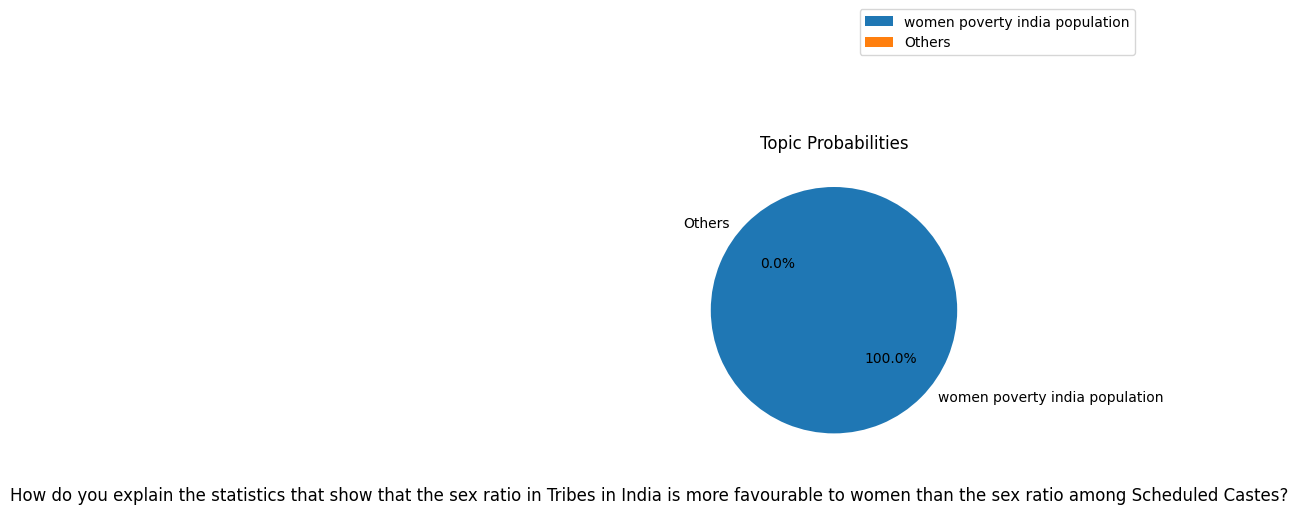

In [34]:
plt.figure(figsize=(4, 4))
plt.pie(probs_to_plot, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Topic Probabilities')
plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1.5))
plt.text(-1.5, -1.5, questions[question_index], fontsize=12, ha="center", va="center")
plt.show()

In [35]:
df['Topic_Number'] = topics
df.sample(5)

,Year,Question,Topic_Number
176,2015,"The states of Jammu and Kashmir, Himachal Prad...",0
79,2020,How have digital initiatives in India contribu...,4
47,2021,Why is India considered as a sub-continent? El...,-1
40,2021,Evaluate the nature of the Bhakti Literature a...,1
182,2014,Taxila university was one of the oldest univer...,1


In [36]:

df['Topic'] = df['Topic_Number'].apply(lambda x: " ".join(model.get_topic_info(topic=x)['Name'].iloc[0].split('_')[1:]))

# Display the first few rows of the DataFrame
df.head()

,Year,Question,Topic_Number,Topic
0,2023,Explain the role of geographical factors towar...,-1,india discuss did revolution
1,2023,What was the difference between Mahatma Gandhi...,6,mahatma gandhi mahatma gandhi struggle
2,2023,Bring out the socio-economic effects of the in...,4,india cities new smart
3,2023,Discuss the consequences of climate change on ...,0,water india world discuss
4,2023,Why is the world today confronted with a crisi...,0,water india world discuss


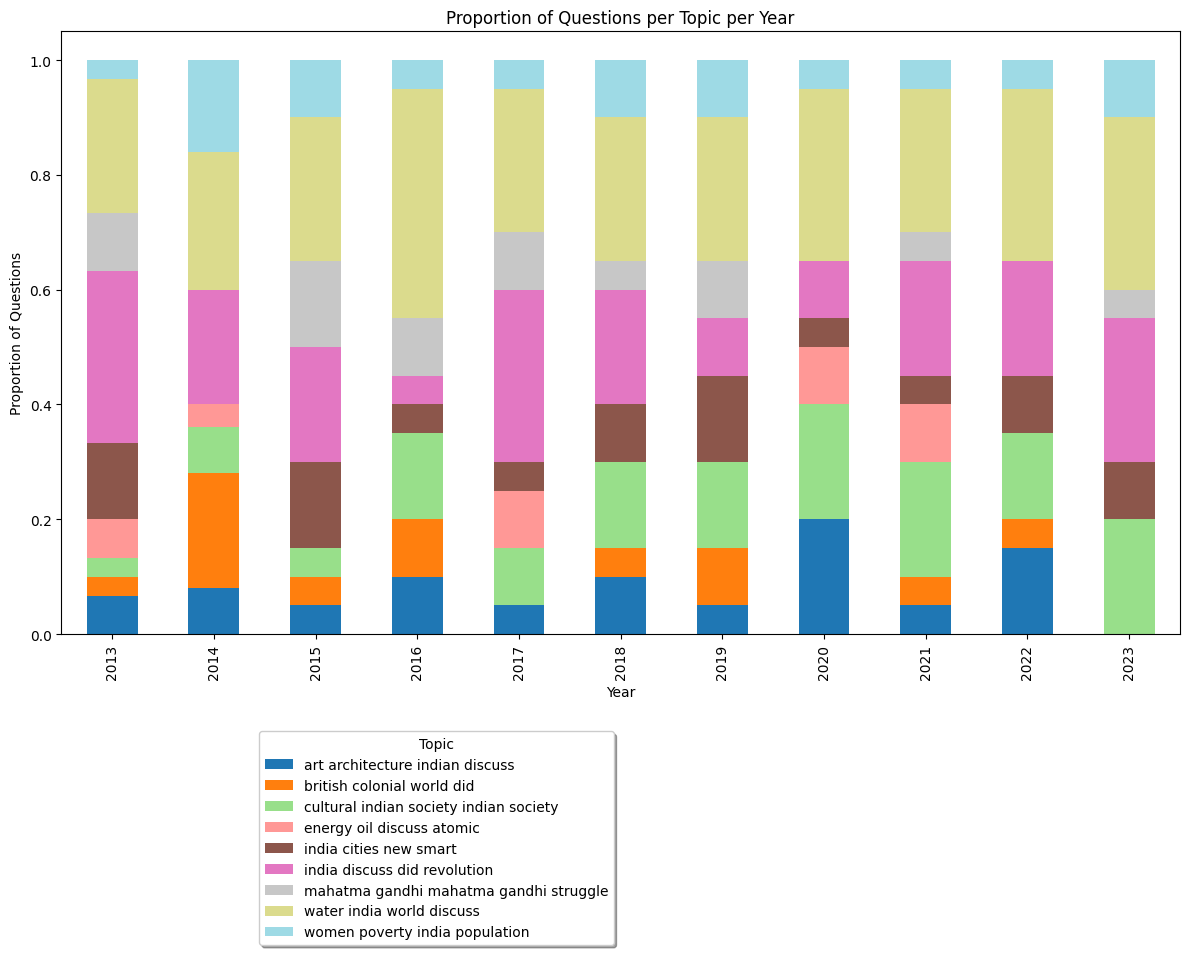

In [37]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Assuming df is your DataFrame and it now includes a 'Topic' column after categorization

# Step 2: Count questions per topic per year
topic_year_counts = df.groupby(['Year', 'Topic']).size().reset_index(name='Count')

# Calculate the total number of questions per year
total_questions_per_year = topic_year_counts.groupby('Year')['Count'].transform('sum')

# Calculate the proportion of questions per topic per year
topic_year_counts['Proportion'] = topic_year_counts['Count'] / total_questions_per_year

# Step 3: Prepare data for plotting (normalized)
pivot_table = topic_year_counts.pivot(index='Year', columns='Topic', values='Proportion')

# Generate a list of colors from a colormap
num_topics = len(pivot_table.columns)
colors = plt.get_cmap('tab20', num_topics)

# Step 4: Plot the normalized data with different colors for each topic
pivot_table.plot(kind='bar', stacked=True, figsize=(12, 8), color=[colors(i) for i in range(num_topics)])

# Step 5: Customize the plot
plt.xlabel('Year')
plt.ylabel('Proportion of Questions')
plt.title('Proportion of Questions per Topic per Year')
plt.legend(title='Topic', loc='best', bbox_to_anchor=(0.5, -0.15), ncol=1, fancybox=True, shadow=True)
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)
plt.show()

In [38]:
num_words = 7
for topic_num in set(topics):
    if topic_num != -1:  # -1 is the outlier class in BERTopic
        topic = model.get_topic(topic_num)
        if topic:  # Check if topic is not None
            top_words = [word for word, _ in topic[:num_words]]
            print(f"Topic {topic_num}: {top_words}")

Topic 0: ['water', 'india', 'world', 'discuss', 'explain', 'resources', 'weather']
Topic 1: ['art', 'architecture', 'indian', 'discuss', 'history', 'early', 'period']
Topic 2: ['energy', 'oil', 'discuss', 'atomic', 'iron', 'iron steel', 'material']
Topic 3: ['women', 'poverty', 'india', 'population', 'ratio', 'sex ratio', 'sex']
Topic 4: ['india', 'cities', 'new', 'smart', 'urban', 'discuss', 'socio economic']
Topic 5: ['cultural', 'indian', 'society', 'indian society', 'secularism', 'caste', 'identity']
Topic 6: ['mahatma gandhi', 'mahatma', 'gandhi', 'struggle', 'freedom', 'movement', 'century']
Topic 7: ['british', 'colonial', 'world', 'did', 'power', 'india', 'anti colonial']
